In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import random

In [2]:
plays_df = pd.concat(map(pd.read_csv, glob.glob(f'data/nfl-big-data-bowl-*/plays.csv')))
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType,playType,numberOfPassRushers,typeDropback,offensePlayResult,epa,isDefensivePI
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
plays_df.dtypes

gameId                                int64
playId                                int64
playDescription                      object
quarter                               int64
down                                  int64
yardsToGo                             int64
possessionTeam                       object
specialTeamsPlayType                 object
specialTeamsResult                   object
kickerId                            float64
returnerId                           object
kickBlockerId                       float64
yardlineSide                         object
yardlineNumber                        int64
gameClock                            object
penaltyCodes                         object
penaltyJerseyNumbers                 object
penaltyYards                        float64
preSnapHomeScore                    float64
preSnapVisitorScore                 float64
passResult                           object
kickLength                          float64
kickReturnYardage               

In [4]:
plays_df['play_uuid'] = plays_df['gameId'].astype(str) + '.' + plays_df['playId'].astype(str)
plays_df['play_uuid'].head()

0     2018090600.37
1    2018090600.366
2    2018090600.658
3    2018090600.677
4    2018090600.872
Name: play_uuid, dtype: object

In [5]:
third_down_df = plays_df.loc[(plays_df['down'] == 3)]
third_down_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'specialTeamsPlayType', 'specialTeamsResult',
       'kickerId', 'returnerId', 'kickBlockerId', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers',
       'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'kickLength', 'kickReturnYardage', 'playResult',
       'absoluteYardlineNumber', 'ballCarrierId', 'ballCarrierDisplayName',
       'defensiveTeam', 'passLength', 'prePenaltyPlayResult',
       'playNullifiedByPenalty', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'foulName3',
       'foulNFLId3', 'personnelO', 'defendersInBox', 'personnelD',
     

In [6]:
# prompt: load all CSV files with a name like "tracking_week_" into a tracking_df dataframe
import glob
tracking_df = pd.concat(map(pd.read_csv, glob.glob(f'data/nfl-big-data-bowl-*/*week*.csv')))

In [7]:
tracking_df['play_uuid'] = tracking_df['gameId'].astype(str) + '.' + tracking_df['playId'].astype(str)
tracking_df['play_uuid'].head()

0    2022100600.90
1    2022100600.90
2    2022100600.90
3    2022100600.90
4    2022100600.90
Name: play_uuid, dtype: object

In [57]:
tracking_df['event'].unique()

array([nan, 'ball_snap', 'handoff', 'first_contact', 'tackle',
       'pass_arrived', 'pass_outcome_caught', 'out_of_bounds', 'run',
       'fumble', 'man_in_motion', 'autoevent_passforward', 'shift',
       'play_action', 'touchdown', 'pass_forward', 'snap_direct',
       'line_set', 'qb_slide', 'autoevent_ballsnap',
       'autoevent_passinterrupted', 'pass_shovel', 'lateral',
       'penalty_flag', 'qb_sack', 'fumble_offense_recovered', 'safety',
       'pass_outcome_touchdown', 'fumble_defense_recovered',
       'run_pass_option', 'penalty_accepted', 'pass_outcome_incomplete',
       'pass_tipped', 'qb_strip_sack', 'huddle_break_offense',
       'dropped_pass', 'pass_outcome_interception', 'touchback',
       'qb_spike', 'field_goal_blocked', 'punt_fake', 'pass_lateral',
       'field_goal_fake', 'huddle_start_offense', 'timeout_home',
       'field_goal_play'], dtype=object)

In [122]:
ball_snap_df = tracking_df.loc[(tracking_df['event'] == 'ball_snap')]
ball_snap_df['team'] = ball_snap_df['team'].combine_first(ball_snap_df['club'])
ball_snap_df.head()

/var/folders/m8/xlwp526d3sxf6fyr2v802l_80000gn/T/ipykernel_65573/2019373593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ball_snap_df['team'] = ball_snap_df['team'].combine_first(ball_snap_df['club'])


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,s,a,dis,o,dir,event,team,position,route,play_uuid
5,2022100600,90,33084.0,Matt Ryan,6,2022-10-06 20:17:05.299999,2.0,IND,left,90.26,...,0.20,0.14,0.04,274.45,250.64,ball_snap,IND,NaN,NaN,2022100600.90
65,2022100600,90,35459.0,Kareem Jackson,6,2022-10-06 20:17:05.299999,22.0,DEN,left,72.17,...,0.48,0.94,0.05,119.60,125.33,ball_snap,DEN,NaN,NaN,2022100600.90
125,2022100600,90,42030.0,K'Waun Williams,6,2022-10-06 20:17:05.299999,21.0,DEN,left,80.22,...,3.41,2.96,0.35,128.25,199.16,ball_snap,DEN,NaN,NaN,2022100600.90
185,2022100600,90,42393.0,Ronald Darby,6,2022-10-06 20:17:05.299999,23.0,DEN,left,76.83,...,0.04,0.14,0.01,73.29,206.98,ball_snap,DEN,NaN,NaN,2022100600.90
245,2022100600,90,43307.0,Ryan Kelly,6,2022-10-06 20:17:05.299999,78.0,IND,left,85.75,...,0.08,0.38,0.01,252.44,311.45,ball_snap,IND,NaN,NaN,2022100600.90


In [123]:
position_counts = ball_snap_df[['play_uuid', 'nflId']].groupby('play_uuid').count()
all_22_plays = position_counts.loc[(position_counts['nflId'] == 22)].index
all_22_plays

Index(['2018091607.329', '2018093011.544', '2018111106.554', '2018111808.1165',
       '2018120901.1570', '2021090900.1078', '2021090900.1203',
       '2021090900.1227', '2021090900.1267', '2021090900.1312',
       ...
       '2022110700.3787', '2022110700.403', '2022110700.443', '2022110700.493',
       '2022110700.546', '2022110700.612', '2022110700.670', '2022110700.80',
       '2022110700.929', '2022110700.950'],
      dtype='object', name='play_uuid', length=14860)

In [124]:
all_22_df = ball_snap_df.loc[(ball_snap_df['play_uuid'].isin(all_22_plays))]
all_22_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,s,a,dis,o,dir,event,team,position,route,play_uuid
5,2022100600,90,33084.0,Matt Ryan,6,2022-10-06 20:17:05.299999,2.0,IND,left,90.26,...,0.20,0.14,0.04,274.45,250.64,ball_snap,IND,NaN,NaN,2022100600.90
65,2022100600,90,35459.0,Kareem Jackson,6,2022-10-06 20:17:05.299999,22.0,DEN,left,72.17,...,0.48,0.94,0.05,119.60,125.33,ball_snap,DEN,NaN,NaN,2022100600.90
125,2022100600,90,42030.0,K'Waun Williams,6,2022-10-06 20:17:05.299999,21.0,DEN,left,80.22,...,3.41,2.96,0.35,128.25,199.16,ball_snap,DEN,NaN,NaN,2022100600.90
185,2022100600,90,42393.0,Ronald Darby,6,2022-10-06 20:17:05.299999,23.0,DEN,left,76.83,...,0.04,0.14,0.01,73.29,206.98,ball_snap,DEN,NaN,NaN,2022100600.90
245,2022100600,90,43307.0,Ryan Kelly,6,2022-10-06 20:17:05.299999,78.0,IND,left,85.75,...,0.08,0.38,0.01,252.44,311.45,ball_snap,IND,NaN,NaN,2022100600.90


In [125]:
third_down_frames_df = ball_snap_df.loc[(ball_snap_df['play_uuid'].isin(third_down_df['play_uuid']))]
third_down_frames_df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,s,a,dis,o,dir,event,team,position,route,play_uuid
22683,2022100600,1069,38540.0,Stephon Gilmore,6,2022-10-06 20:58:22.400000,5.0,IND,left,38.44,...,0.05,0.05,0.00,37.15,272.30,ball_snap,IND,NaN,NaN,2022100600.1069
22734,2022100600,1069,38605.0,Russell Wilson,6,2022-10-06 20:58:22.400000,3.0,DEN,left,45.20,...,0.00,0.00,0.01,272.11,354.59,ball_snap,DEN,NaN,NaN,2022100600.1069
22785,2022100600,1069,38843.0,Rodney McLeod,6,2022-10-06 20:58:22.400000,26.0,IND,left,40.60,...,0.01,0.01,0.00,76.12,96.10,ball_snap,IND,NaN,NaN,2022100600.1069
22836,2022100600,1069,41369.0,Cameron Fleming,6,2022-10-06 20:58:22.400000,73.0,DEN,left,45.05,...,0.56,1.91,0.06,273.86,214.51,ball_snap,DEN,NaN,NaN,2022100600.1069
22887,2022100600,1069,42358.0,Melvin Gordon,6,2022-10-06 20:58:22.400000,25.0,DEN,left,49.91,...,0.11,0.63,0.01,261.38,256.08,ball_snap,DEN,NaN,NaN,2022100600.1069


In [126]:
third_down_frames_df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'team', 'position', 'route', 'play_uuid'],
      dtype='object')

In [127]:
random_play =  random.randint(0, len(third_down_frames_df))
random_id = third_down_frames_df.iloc[random_play]['play_uuid']
play_frame = third_down_frames_df.loc[(third_down_frames_df['play_uuid'] == random_id)]
play_frame

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,s,a,dis,o,dir,event,team,position,route,play_uuid
176461,2022102300,3136,38557.0,Kevin Zeitler,6,2022-10-23 15:31:57.099999,70.0,BAL,right,63.940000,...,0.07,0.56,0.01,91.31,21.33,ball_snap,BAL,NaN,NaN,2022102300.3136
176512,2022102300,3136,43295.0,Ronnie Stanley,6,2022-10-23 15:31:57.099999,79.0,BAL,right,63.390000,...,0.00,0.00,0.01,94.85,338.80,ball_snap,BAL,NaN,NaN,2022102300.3136
176563,2022102300,3136,43341.0,Deion Jones,6,2022-10-23 15:31:57.099999,54.0,CLE,right,68.890000,...,0.11,0.73,0.01,262.49,60.62,ball_snap,CLE,NaN,NaN,2022102300.3136
176614,2022102300,3136,44813.0,Myles Garrett,6,2022-10-23 15:31:57.099999,95.0,CLE,right,65.540000,...,0.11,1.11,0.03,291.23,264.19,ball_snap,CLE,NaN,NaN,2022102300.3136
176665,2022102300,3136,44903.0,John Johnson,6,2022-10-23 15:31:57.099999,43.0,CLE,right,69.550000,...,0.53,0.88,0.05,271.78,63.43,ball_snap,CLE,NaN,NaN,2022102300.3136
176716,2022102300,3136,45268.0,Patrick Ricard,6,2022-10-23 15:31:57.099999,42.0,BAL,right,62.570000,...,0.00,0.00,0.00,85.82,1.03,ball_snap,BAL,NaN,NaN,2022102300.3136
176767,2022102300,3136,46098.0,Taven Bryan,6,2022-10-23 15:31:57.099999,99.0,CLE,right,65.060000,...,0.00,0.00,0.04,218.95,297.29,ball_snap,CLE,NaN,NaN,2022102300.3136
176818,2022102300,3136,46101.0,Lamar Jackson,6,2022-10-23 15:31:57.099999,8.0,BAL,right,59.750000,...,0.09,0.25,0.01,97.80,87.61,ball_snap,BAL,NaN,NaN,2022102300.3136
176869,2022102300,3136,46155.0,Mark Andrews,6,2022-10-23 15:31:57.099999,89.0,BAL,right,59.850000,...,0.31,0.09,0.04,82.10,11.83,ball_snap,BAL,NaN,NaN,2022102300.3136
176920,2022102300,3136,47852.0,Josh Oliver,6,2022-10-23 15:31:57.099999,84.0,BAL,right,64.060000,...,0.00,0.00,0.00,81.23,79.06,ball_snap,BAL,NaN,NaN,2022102300.3136


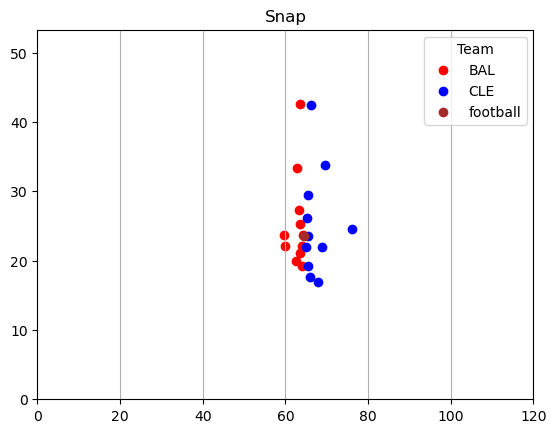

In [128]:
teams = play_frame['team'].unique()
colors = {teams[0]: 'red', teams[1]: 'blue', teams[2]: 'brown'}

for team, color in colors.items():
    plt.scatter(play_frame[play_frame['team'] == team]['x'], play_frame[play_frame['team'] == team]['y'], c=color, label=team)

plt.title('Snap')
plt.legend(title='Team')

# Set x and y scales

plt.xlim(0, 120)  # Adjust the limits according to your data
plt.ylim(0, 53.3)  # Adjust the limits according to your data

# Show plot
plt.grid(True, axis='x')
plt.show()
